In [2]:
import numpy as np
import scipy.optimize as optimize
from math import exp,sqrt
"""
sh = sheerwood number
d = filament diameter
D_PFBA = Diffusion coefficient of PFAS in water
"""
def Mass_transfer():
    sh = 66
    d = 7e-4
    D_PFBA = 6.2e-10
    k = sh * D_PFBA/d
    return k

k = Mass_transfer()
print("Mass_transfer:",k)

"""
R = Rejection
k = Mass transfer coefficient
Jw = Hydraulic flux
B = Solute(PFBA) Permeability (m/s): 1.12517e-05 (R = 0.3, before modification), 4.82217e-06(R=0.5, after SIMULATED)  3.351e-06 (R = 0.59, after modication), 4.87087e-08 (99% rejection, ideal membrane)
A = Hydraulic Permeability (m/s) : 5.07e-07 (R = 0.3, before modification), 4.4744e-07 (R=0.5, after SIMULATED) 3.889e-07(R=0.59, after modification), 2.9983e-07(99% rejection, ideal membrane)

Test with different membranes assuming a 40% decline in water perm.
Pw1 = 7.38e-07, 7.33e-07, 1.09e-06, 1.23e-06
"""
def func(B):
    R = 95
    k = 2.14e-5   #(m/s)
    Jw = 8.3333e-6  #(m/s, 19LMH)
    w = exp(Jw/k)
    X = (1-R)*Jw
    Z = R* w
    return B - X/Z 

PFBA_Permeabilty =optimize.bisect(func,1e-12,1e-6, xtol=5e-17, rtol= 5e-15, maxiter = 500)
print("PFBA_Permeability:",PFBA_Permeabilty) 


Mass_transfer: 5.845714285714286e-05


ValueError: f(a) and f(b) must have different signs

In [28]:
""" 
Estimating the water permeability coefficient 
"""
k = 5.8457e-5 
jw = 5.2778e-6
Ps = 4.82217e-06 
Ca = 0.001;	P = 0.00007;	K = 0.00060;	
Mg = 0.00035; Na = 0.00593;	SO4 = 0.00089; Cl = 0.00593
Pfba = 0.0001
Cb = (Cl + Na + Mg + Ca + K + SO4 + Pfba)
Pbar = 12
PHI = 1
T = 298.15
def func(Pw):
    z = exp (jw / k)
    cm = ((Ps + jw) * Cb * z) / (jw + Ps * z)
    cp = Ps * Cb * z / (jw + Ps * z)            
    return jw/(Pbar - (PHI * cm - 0.98 * cp) * T *0.083145) - Pw 
Water_Permeabilty =optimize.bisect(func,1e-10,1e-4, xtol=5e-17, rtol= 5e-15, maxiter = 500)
print("Water_Permeabilty:",Water_Permeabilty)

Water_Permeabilty: 4.4743975191252234e-07


c:\Users\Mangu\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


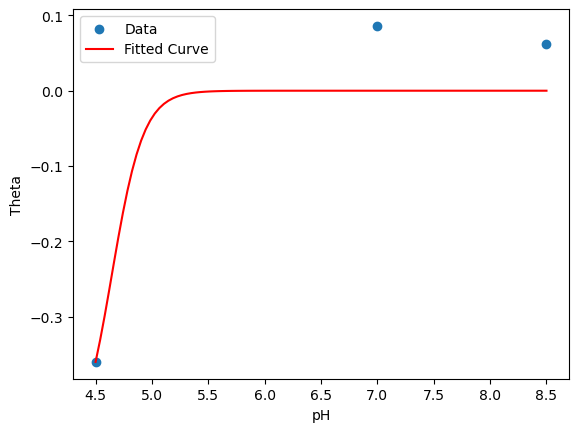

Fitted Parameters:
L: -0.4884322547986471
k: -7.133138660038161
x0: 4.644492026543838


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Your data
pH = np.array([4.5, 7, 8.5])
theta = np.array([-0.36, 0.086, 0.062])

# Define the logistic function
def logistic_function(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Initial guess for the parameters
initial_guess = [-0.4, 0.5, 8.5]

# Fit the logistic function to the data
params, covariance = curve_fit(logistic_function, pH, theta, p0=initial_guess)

# Generate pH values for plotting the fitted curve
pH_fit = np.linspace(min(pH), max(pH), 100)
theta_fit = logistic_function(pH_fit, *params)

# Plot the original data and the fitted curve
plt.scatter(pH, theta, label='Data')
plt.plot(pH_fit, theta_fit, label='Fitted Curve', color='red')
plt.xlabel('pH')
plt.ylabel('Theta')
plt.legend()
plt.show()

# Display the fitted parameters
print("Fitted Parameters:")
print("L:", params[0])
print("k:", params[1])
print("x0:", params[2])


Fitted Parameters:
L: -0.48843 +/- nan
k: -7.13314 +/- nan
x0: 4.64449 +/- nan


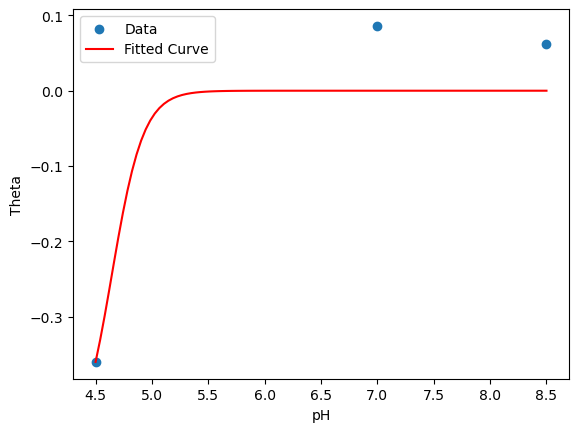

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats.distributions import t

# Your data
pH = np.array([4.5, 7, 8.5])
theta = np.array([-0.36, 0.086, 0.062])

# Define the logistic function
def logistic_function(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Initial guess for the parameters
initial_guess = [-0.4, 0.5, 8.5]

# Fit the logistic function to the data
params, covariance = curve_fit(logistic_function, pH, theta, p0=initial_guess)

# Number of data points
n = len(theta)

# Number of parameters
p = len(params)

# Degrees of freedom
dof = max(0, n - p)

# Student-t value for the degrees of freedom and confidence level
tval = t.ppf(0.975, dof)

# Standard errors of the parameters
stderr = np.sqrt(np.diag(covariance))

# 95% confidence intervals for each parameter
conf_intervals = tval * stderr

# Display the fitted parameters and their confidence intervals
print("Fitted Parameters:")
for i, param in enumerate(params):
    print(f"{['L', 'k', 'x0'][i]}: {param:.5f} +/- {conf_intervals[i]:.5f}")

# Generate pH values for plotting the fitted curve
pH_fit = np.linspace(min(pH), max(pH), 100)
theta_fit = logistic_function(pH_fit, *params)

# Plot the original data and the fitted curve
plt.scatter(pH, theta, label='Data')
plt.plot(pH_fit, theta_fit, label='Fitted Curve', color='red')
plt.xlabel('pH')
plt.ylabel('Theta')
plt.legend()
plt.show()


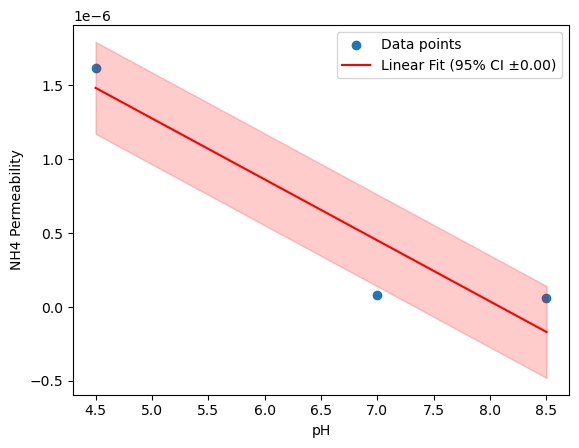

Slope: -4.128979591836735e-07
Intercept: 3.3406530612244903e-06
Correlation Coefficient (r): -0.9334706791279244


In [18]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Data
NH4_permeability = np.array([1.62e-6, 8.4e-7, 6e-7])
pH = np.array([4.5, 7, 8.5])

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(pH, NH4_permeability)

# Calculate fitted values
fit_values = slope * pH + intercept

# Calculate 95% confidence interval
confidence_interval = 1.96 * std_err

# Plotting the data and the linear fit
plt.scatter(pH, NH4_permeability, label='Data points')
plt.plot(pH, fit_values, color='red', label=f'Linear Fit (95% CI ±{confidence_interval:.2f})')

# Plot confidence interval as shaded region
plt.fill_between(pH, fit_values - confidence_interval, fit_values + confidence_interval, color='red', alpha=0.2)

# Add labels and legend
plt.xlabel('pH')
plt.ylabel('NH4 Permeability')
plt.legend()

# Show the plot
plt.show()

# Display the slope, intercept, and correlation coefficient
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Correlation Coefficient (r): {r_value}")
